In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

In [3]:
debussy_file = "musics/debussy.wav"
redhot_file = "musics/redhot.wav"
duke_file = "musics/duke.wav"

debussy, _ = librosa.load(debussy_file)
redhot, _ = librosa.load(redhot_file)
duke, _ = librosa.load(duke_file)

In [ ]:
# Extract RMSE with librosa

FRAME_LENGTH = 1024
HOP_LENGTH = 512

rms_debussy = librosa.feature.rms(y=debussy, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
rms_redhot = librosa.feature.rms(y=redhot, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
rms_duke = librosa.feature.rms(y=duke, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]


In [12]:
rms_debussy

array([0.03491691, 0.05298564, 0.05961845, ..., 0.01386144, 0.01489561,
       0.01443748], dtype=float32)

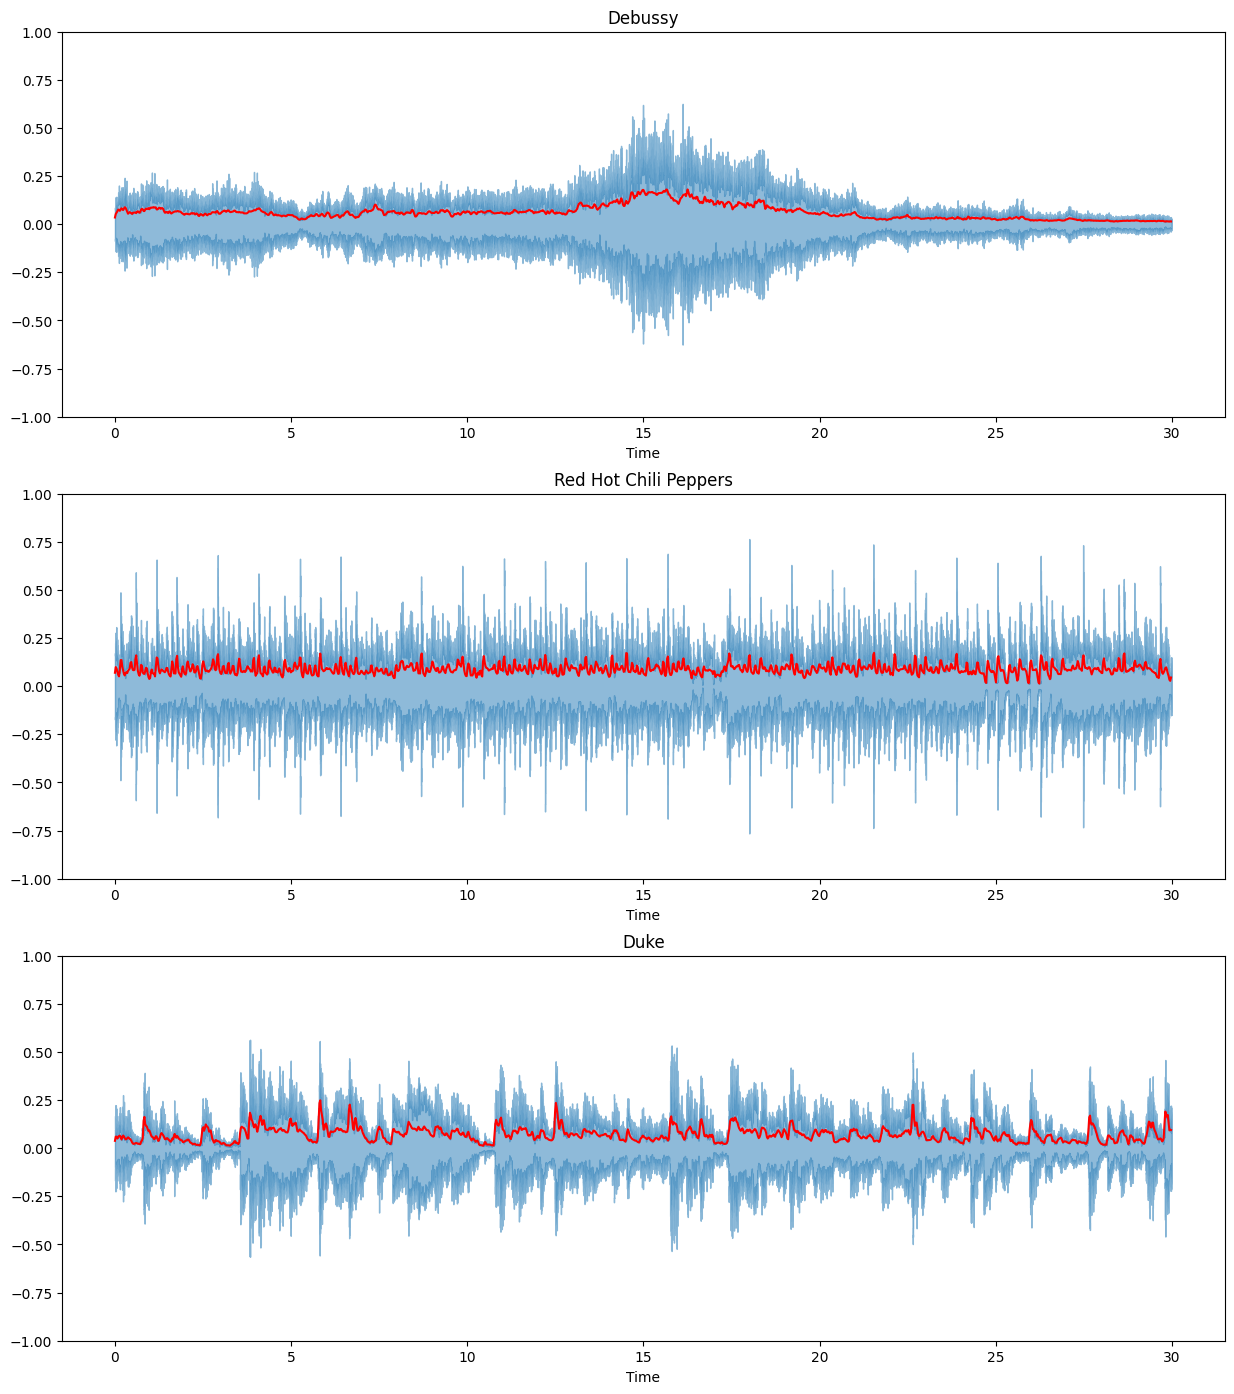

In [13]:
# Plot RMSE for all music pieces

# Visualize the amplitude envelope for all three audio signals

frames = range(0, rms_debussy.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(15, 17))

plt.subplot(3, 1, 1)
librosa.display.waveshow(debussy, alpha=0.5)
plt.plot(t, rms_debussy, color='r')
plt.title("Debussy")
plt.ylim(-1, 1)

plt.subplot(3, 1, 2)
librosa.display.waveshow(redhot, alpha=0.5)
plt.plot(t, rms_redhot, color='r')
plt.title("Red Hot Chili Peppers")
plt.ylim(-1, 1)

plt.subplot(3, 1, 3)
librosa.display.waveshow(duke, alpha=0.5)
plt.plot(t, rms_duke, color='r')
plt.title("Duke")
plt.ylim(-1, 1)

plt.show()